# 교통표식의 식별

In [2]:
root_dir = 'C://Users//ellyj//Documents//고급 통계적 딥러닝//제 10장 자율자동차의 이미지분석//GTSRB_Final_Training_Images//GTSRB//Final_Training//Images//'

In [1]:
from skimage import io
import os
import glob

In [7]:
all_img_paths = glob.glob(os.path.join(root_dir, '*/*.ppm'))
all_img_paths[-5:]

['C://Users//ellyj//Documents//고급 통계적 딥러닝//제 10장 자율자동차의 이미지분석//GTSRB_Final_Training_Images//GTSRB//Final_Training//Images\\00042\\00007_00025.ppm',
 'C://Users//ellyj//Documents//고급 통계적 딥러닝//제 10장 자율자동차의 이미지분석//GTSRB_Final_Training_Images//GTSRB//Final_Training//Images\\00042\\00007_00026.ppm',
 'C://Users//ellyj//Documents//고급 통계적 딥러닝//제 10장 자율자동차의 이미지분석//GTSRB_Final_Training_Images//GTSRB//Final_Training//Images\\00042\\00007_00027.ppm',
 'C://Users//ellyj//Documents//고급 통계적 딥러닝//제 10장 자율자동차의 이미지분석//GTSRB_Final_Training_Images//GTSRB//Final_Training//Images\\00042\\00007_00028.ppm',
 'C://Users//ellyj//Documents//고급 통계적 딥러닝//제 10장 자율자동차의 이미지분석//GTSRB_Final_Training_Images//GTSRB//Final_Training//Images\\00042\\00007_00029.ppm']

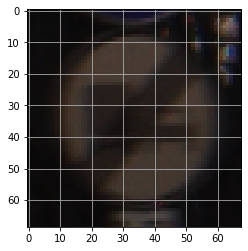

In [6]:
import matplotlib.pyplot as plt
import cv2
#img=cv2.imread('C://Users//ellyj//Documents//고급 통계적 딥러닝//제 10장 자율자동차의 이미지분석//GTSRB_Final_Training_Images//GTSRB//Final_Training//Images//00042//00007_00029.ppm')
img=cv2.imread('00007_00029.ppm')

plt.imshow(img)
plt.grid('off')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import cv2
for img_path in all_img_paths[0:30:10]:
    img=cv2.imread(img_path)
    plt.imshow(img)
    plt.grid('off')
    plt.show()

In [8]:
import numpy as np
from skimage import color, exposure, transform

IMG_SIZE = 40

# 명도 조절
def preprocess_img(img):
    hsv = color.rgb2hsv(img)
    hsv[:, :, 2] = exposure.equalize_hist(hsv[:, :, 2]) # 유사한 명도로 전환, 픽셀 내 숫자를 0~1 사이의 값반환
    img = color.hsv2rgb(hsv)
    img = transform.resize(img, (IMG_SIZE, IMG_SIZE)) # 픽셀 크기 동일하게


    return img

In [9]:
# 표준화 전처리 적용
img_eg=np.array(preprocess_img(io.imread(all_img_paths[0])))
print(img_eg.shape)
max_1=np.max(img_eg)
print(max_1)

# 전처리 전
max_2=np.array(io.imread(all_img_paths[0]))
max_2=np.max(max_2)
print(max_2)

(40, 40, 3)
1.0
255


transformed


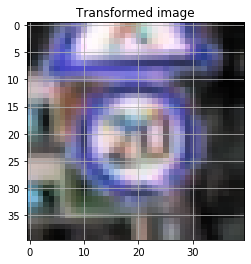

transformed


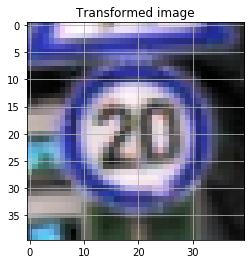

transformed


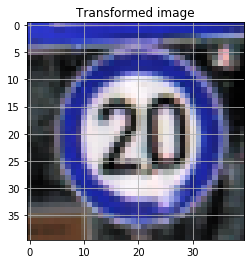

In [46]:
import matplotlib.pyplot as plt
import cv2

for img_path in all_img_paths[0:30:10]:
    img = cv2.imread(img_path)
    img = preprocess_img(img)
    print('transformed')
    
    plt.imshow(img)
    plt.grid('off')    
    plt.title('Transformed image')
    plt.show()

In [11]:
from tensorflow.keras.utils import to_categorical

imgs = []
labels = []
for img_path in all_img_paths:
    img = preprocess_img(io.imread(img_path))
    label = img_path.split('\\')[-2]
    imgs.append(img) # 특성변수
    labels.append(label) # 목적변수

X=np.array(imgs) 
print(np.max(X))
classes=len(set(np.array(labels)))
print(classes)

# one-hot 벡터화
y=to_categorical(labels,num_classes=classes)

1.0000000000000004
43


In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=2)
print(x_train.shape, y_train.shape)

(31367, 40, 40, 3) (31367, 43)


In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(IMG_SIZE, IMG_SIZE, 3),activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # 픽셀의 크기를 1/2로 줄인다
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding='same',activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 40, 40, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 38, 38, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 19, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 19, 19, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 19, 19, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 17, 17, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)         

In [57]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [60]:
history = model.fit(x_train, y_train,
          batch_size=32,
          epochs=10,
          validation_data = (x_test, y_test)
          )

Train on 31367 samples, validate on 7842 samples
Epoch 1/10
31367/31367 [==============================] - 2699s 86ms/step - loss: 1.1175 - acc: 0.6750 - val_loss: 0.1589 - val_acc: 0.9552
Epoch 2/10
31367/31367 [==============================] - 2662s 85ms/step - loss: 0.1980 - acc: 0.9379 - val_loss: 0.0673 - val_acc: 0.9784
Epoch 3/10
31367/31367 [==============================] - 2654s 85ms/step - loss: 0.1308 - acc: 0.9583 - val_loss: 0.0478 - val_acc: 0.9866
Epoch 4/10
31367/31367 [==============================] - 2663s 85ms/step - loss: 0.0959 - acc: 0.9702 - val_loss: 0.0446 - val_acc: 0.9874
Epoch 5/10
31367/31367 [==============================] - 2665s 85ms/step - loss: 0.0865 - acc: 0.9740 - val_loss: 0.0635 - val_acc: 0.9844
Epoch 6/10
31367/31367 [==============================] - 2660s 85ms/step - loss: 0.0812 - acc: 0.9747 - val_loss: 0.0303 - val_acc: 0.9909
Epoch 7/10
31367/31367 [==============================] - 2656s 85ms/step - loss: 0.0712 - acc: 0.9791 - val_lo

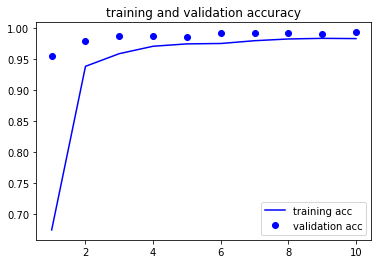

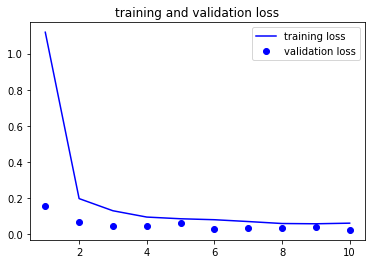

In [61]:
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='training acc')
plt.plot(epochs,val_acc,'bo',label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='training loss')
plt.plot(epochs,val_loss,'bo',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()